<a href="https://colab.research.google.com/github/pradhiksha2000/day_4/blob/main/day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import ness packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("/content/titanic.xlsx")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

In [6]:
print("number of rows{}",format(data.shape[0]))
print("number of columns{}",format(data.shape[1]))

number of rows{} 891
number of columns{} 12


In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
#info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#dataset description

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#calc missing variables

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

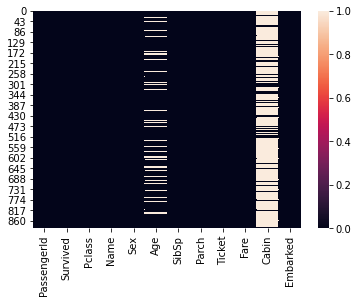

In [13]:
#plot yhe missing variables

sns.heatmap(data.isnull())

**#preprocessing**

In [ ]:
#sklearn
#labelencoder - when the column is having ony 2 labels here is this dataset we have gender as labels 

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender_le'] = le.fit_ransform (data[['Sex']])
data['gender_le']

AttributeError: ignored

In [20]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
data['Embarked']

In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

ohe.fit_transform(data[['Embarked']]).toarray()

ValueError: ignored

In [25]:
df_1 = pd.get_dummies(data['Embarked'],drop_first=True)

In [27]:
data.drop(['sex','Embarked'], axis = 1, inplace = True)

KeyError: ignored

In [28]:
print(df_1)

     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]


In [30]:
df_2 = pd.concat([data, df_1,] , axis = 1)

In [35]:
# to make age rep in proper manner we nneed to make t rep as scalar variable

from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

df_2['Age'] = scale.fit_transform(df_2[['Age']])




In [37]:
df_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,8.0500,NaN,S,0,1


In [38]:
#x -> indepenent var(1 to many)
#y -> depndent var(1)

x = df_2.drop('Survived', axis = 1)
y = df_2['Survived']

In [39]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S
0,1,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,71.2833,C85,C,0,0
2,3,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,53.1000,C123,S,0,1
4,5,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,8.0500,NaN,S,0,1


In [40]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_Size = 0.25, random_state = 0)

TypeError: ignored

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


NameError: ignored

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

NameError: ignored